In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Exploration and Processing

In [3]:
df = pd.read_csv('aerofit_treadmill_data.csv')

In [4]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [153]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [155]:
#Missing value detection
df.isna().sum() # no missing values detected

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [159]:
# Check for duplicate values
df.duplicated(keep='first').count() # no duplicate values found

180

# Bivariate Analysis

### Product and Gender

In [95]:
crosstab_gender = pd.crosstab(index=df['Product'], columns = df['Gender'], normalize = "index")
crosstab_gender


Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


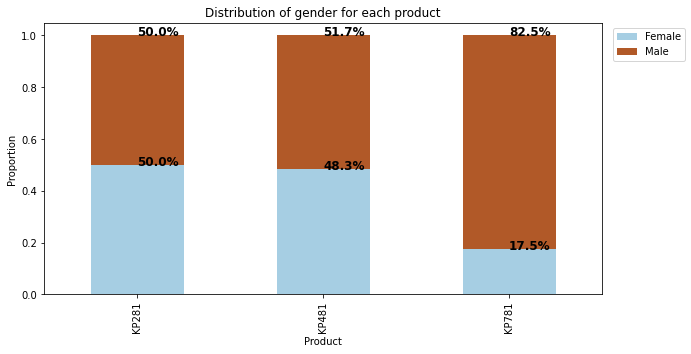

In [123]:
crosstab_gender.plot(kind='bar', stacked= 'True', colormap = 'Paired', figsize = (10,5))
plt.legend(bbox_to_anchor=(1.01,1.0), loc="upper left")
plt.xlabel('Product')
plt.ylabel('Proportion')
plt.title('Distribution of gender for each product')

for n, x in enumerate([*crosstab_gender.index.values]):
    for proportion, y_loc in zip(crosstab_gender.loc[x],crosstab_gender.loc[x].cumsum()) :
        plt.text(x=n, y = y_loc, s = f'{np.round(proportion*100,1)}%', size = 12, fontweight = 'bold')


In [146]:
sale_per_product_per_gender = df.groupby(['Product','Gender'])['Product'].count()
sale_per_product_per_gender

Product  Gender
KP281    Female    40
         Male      40
KP481    Female    29
         Male      31
KP781    Female     7
         Male      33
Name: Product, dtype: int64

In [147]:
sale_per_product_per_gender / sale_per_product_per_gender.groupby('Product').transform('sum')

Product  Gender
KP281    Female    0.500000
         Male      0.500000
KP481    Female    0.483333
         Male      0.516667
KP781    Female    0.175000
         Male      0.825000
Name: Product, dtype: float64

### Product and Marital Status

In [126]:
crosstab_maritalstatus = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], normalize="index")
crosstab_maritalstatus

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


In [37]:
sale_per_product_per_maritalstatus = df.groupby(['Product','MaritalStatus'])['Product'].count()
sale_per_product_per_maritalstatus

Product  MaritalStatus
KP281    Partnered        48
         Single           32
KP481    Partnered        36
         Single           24
KP781    Partnered        23
         Single           17
Name: Product, dtype: int64

In [48]:
sale_per_product_per_maritalstatus / sale_per_product_per_maritalstatus.groupby(['Product']).transform('sum')

Product  MaritalStatus
KP281    Partnered        0.600
         Single           0.400
KP481    Partnered        0.600
         Single           0.400
KP781    Partnered        0.575
         Single           0.425
Name: Product, dtype: float64

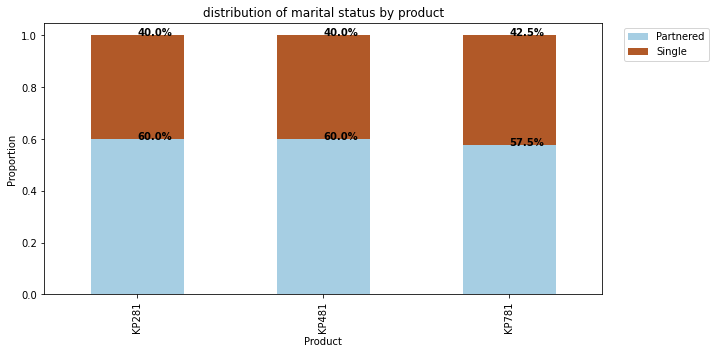

In [145]:
crosstab_maritalstatus.plot(kind='bar', stacked=True, figsize = (10,5), colormap = 'Paired')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor = (1.2,1), loc='upper right')
plt.title('distribution of marital status by product')

for n, x in enumerate([*crosstab_maritalstatus.index.values]):
    for proportion, y_loc in zip(crosstab_maritalstatus.loc[x], crosstab_maritalstatus.loc[x].cumsum()):
        plt.text(x=n, y=y_loc, s=f'{round(proportion*100,1)}%', fontweight='bold')

### Product vs Age, Education,, Usage, Fitness, Income, Miles

In [27]:
df.groupby(['Product'])[['Age','Education','Usage','Fitness','Income','Miles']].mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
KP281,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
KP481,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
KP781,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


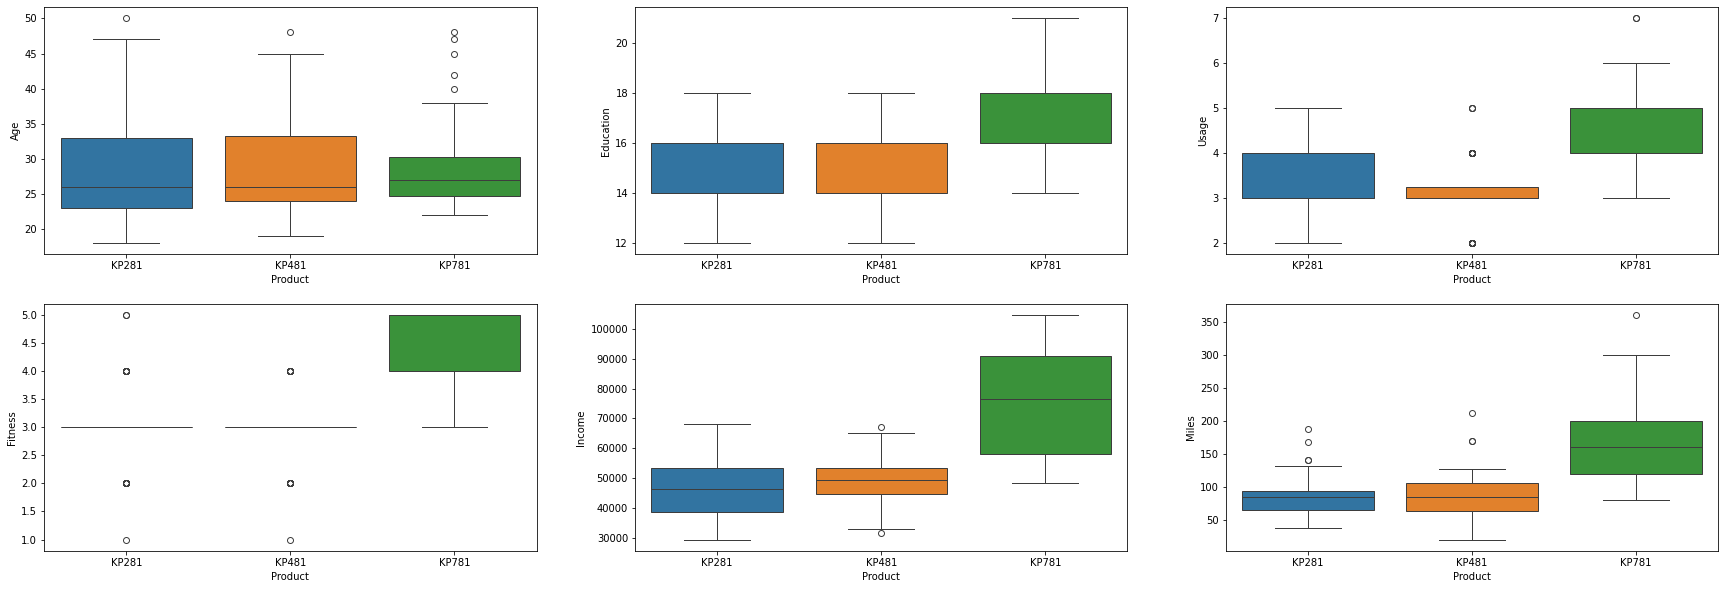

In [152]:
fig, axs = plt.subplots(2,3, figsize=(30,10))
columns = ['Age', 'Education', 'Usage','Fitness', 'Income', 'Miles']

for col, i in zip(columns, axs.flatten()):
    sns.boxplot(x = 'Product', y = col, hue = 'Product', data = df, ax=i)
    

# Observations

The profiles of customers that buy KP281 and KP481 are similar.
- 14 to 16 years of education
- moderate user 3 to 4 times a week
- moderate fitness level of 3 
- age group 24 to 34
- 75% of the customers that buy KP281 have salary > 40K and KP481 buyers have salary > 45K.
- equal interest from both males and females

The profiles of customers that buy the most expensive version of the product are power users
- they are much younger 25 - 30
- more educated 16 to 18 years
- power users 4 to 5 times a week and median 166 per week (double that of cheaper product)
- their fitness level is high 4 to 5
- their median income is also much higher 75K (vs. 47K for cheaper product)
- mostly male buyers (82%)

# Resources

Stacked bar chart: https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b#:~:text=100%25%20stacked%20bar%20chart&text=We%20must%20change%20the%20kind,Everything%20else%20stays%20the%20same.

Subplots: https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca
